In [1]:
import numpy as np
import pandas as pd

In [2]:
%pylab inline
plt.style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
import pathlib

In [4]:
%load_ext autoreload
%autoreload 2

In [7]:
CLOUD = False
if CLOUD:
    DATA_DIR = pathlib.Path('/')
else:
    ROOT_DIR = pathlib.Path('/home/ma/Desktop/all/git/ydata/kaggle/timeseries')
    DATA_DIR = ROOT_DIR.joinpath('data')

In [8]:
DATA_DIR

PosixPath('/home/ma/Desktop/all/git/ydata/kaggle/timeseries/data')

# Data loading

In [56]:
data = pd.read_csv(DATA_DIR.joinpath('gestures/UWaveGestureLibraryAll_TRAIN.ts'),
                  sep=',|:', header=None, skiprows=11)

/home/ma/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [57]:
data

,0,1,2,3,4,5,6,7,8,9,...,936,937,938,939,940,941,942,943,944,945
0,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,...,0.503002,0.492524,0.482045,0.463662,0.445278,0.426895,0.408511,0.390129,0.371746,6
1,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,...,-0.424252,-0.424252,-0.424414,-0.426015,-0.437960,-0.449905,-0.461849,-0.473794,-0.485739,5
2,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,...,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,5
3,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,...,-0.131015,-0.286569,0.051284,0.389136,0.149143,0.245672,0.437129,0.639840,0.842551,3
4,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,...,1.819330,1.741195,1.624052,1.506909,1.439170,1.500978,1.618121,1.735263,1.852405,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,0.126056,...,-0.128241,-0.321706,-0.044231,0.142222,0.328674,0.110026,0.147317,0.184607,0.221897,3
892,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,-1.232312,...,0.233878,0.246070,0.258264,0.270456,0.282650,0.294843,0.307036,0.319229,0.331423,1
893,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,0.285103,...,-0.213164,-0.187128,0.176418,0.138347,0.198371,0.446330,0.161218,0.225716,0.270101,2
894,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,1.251416,...,-0.158187,-0.185514,-0.291492,-0.401972,-0.499320,-0.553890,-0.544005,-0.500638,-0.427876,7


In [58]:
COLS = [f'{comp}_{i}' for comp in ['x', 'y', 'z'] for i in range(315)] + ['label']

In [59]:
data.columns = COLS

In [60]:
data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,z_306,z_307,z_308,z_309,z_310,z_311,z_312,z_313,z_314,label
0,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,...,0.503002,0.492524,0.482045,0.463662,0.445278,0.426895,0.408511,0.390129,0.371746,6
1,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,...,-0.424252,-0.424252,-0.424414,-0.426015,-0.437960,-0.449905,-0.461849,-0.473794,-0.485739,5
2,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,...,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,5
3,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,...,-0.131015,-0.286569,0.051284,0.389136,0.149143,0.245672,0.437129,0.639840,0.842551,3
4,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,...,1.819330,1.741195,1.624052,1.506909,1.439170,1.500978,1.618121,1.735263,1.852405,4


In [61]:
data.label.value_counts()

5    127
1    122
7    112
6    111
4    110
2    108
3    106
8    100
Name: label, dtype: int64

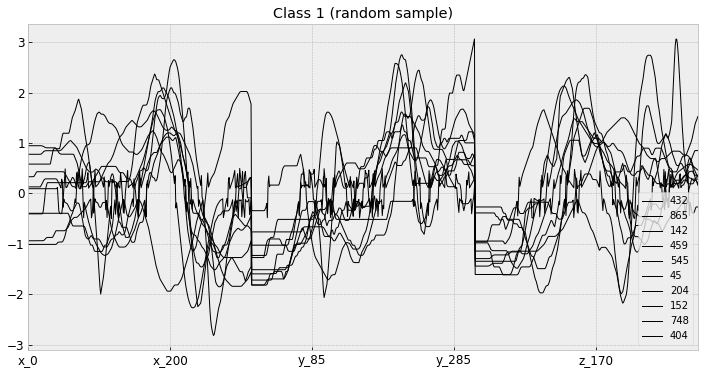

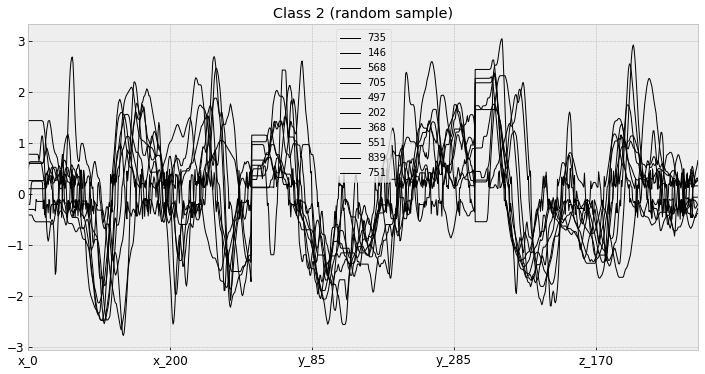

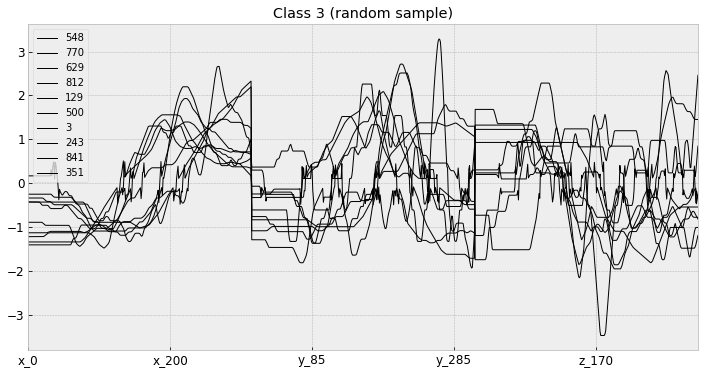

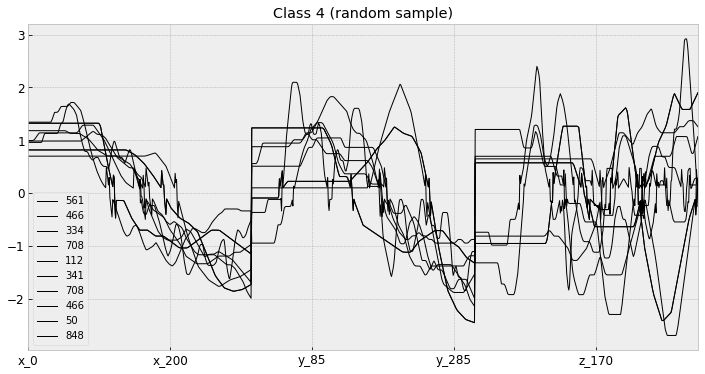

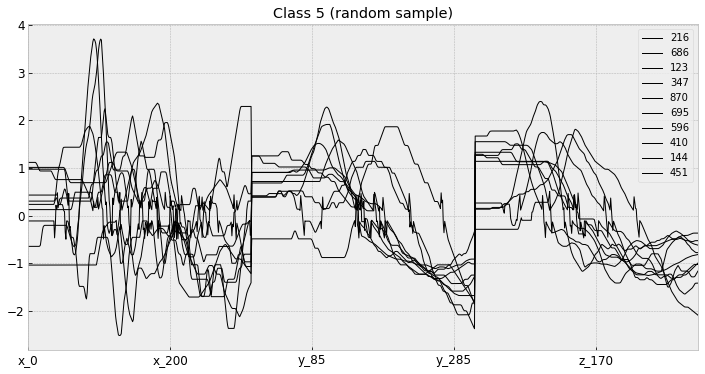

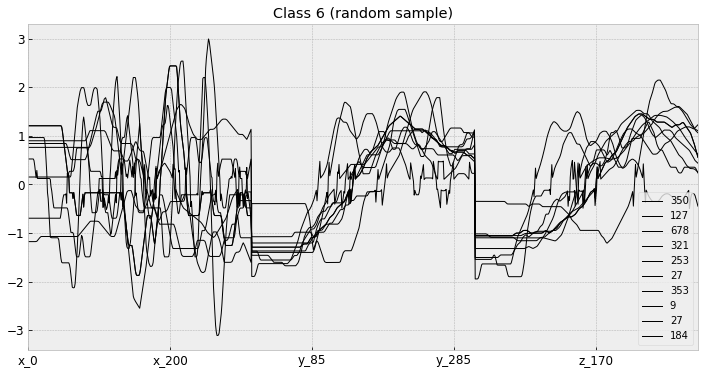

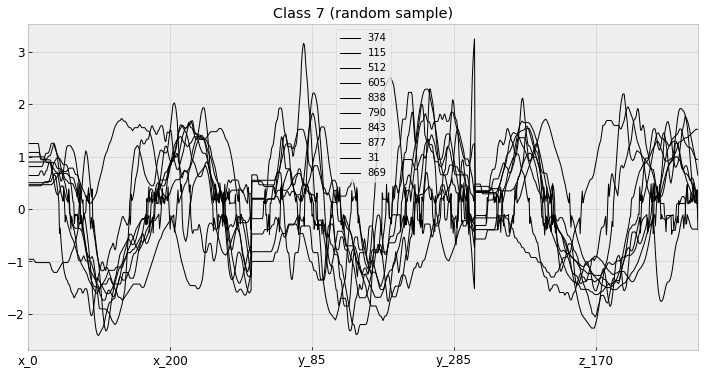

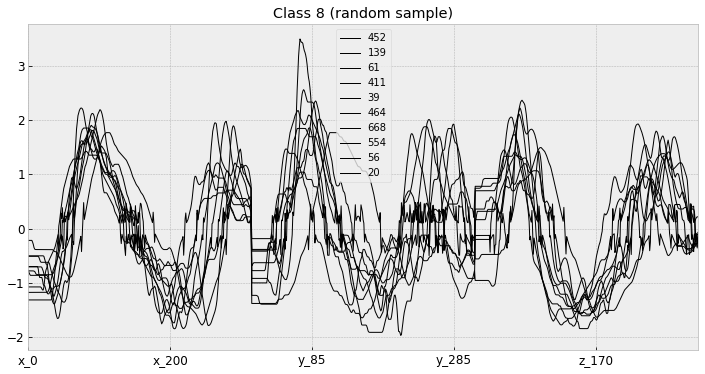

In [68]:
for i in range(1,9):
    sample = data[data.label==i].sample(10, replace=True)
    plt.figure(figsize=(12,6))
    sample.iloc[:,:-1].transpose().plot(ax=plt.gca(), c='k', linewidth=1,
                                       fontsize=12)
    plt.title(f'Class {i} (random sample)')
    plt.show()

In [69]:
# pandas plots column by column so we want to transpose the matrix,
# this way we plot each sample(column)
# also we skip the last column because it's the label
sample.iloc[:,:-1].transpose() 

,452,139,61,411,39,464,668,554,56,20
x_0,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.772239,-0.500935
x_1,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.811198,-0.500935
x_2,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.840702,-0.500935
x_3,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.860248,-0.500935
x_4,-0.704393,-1.173712,-0.697921,-0.510091,-0.216841,-1.073217,-0.777403,-1.312574,-0.860248,-0.500935
...,...,...,...,...,...,...,...,...,...,...
z_310,-0.288710,-0.128270,-0.155406,-0.318148,-0.206094,0.146731,-0.274771,-0.320419,0.153548,-0.268483
z_311,-0.305115,-0.160095,-0.143345,-0.292368,-0.083120,0.181225,-0.274771,-0.320419,-0.239912,-0.252264
z_312,-0.301522,-0.191918,-0.124191,-0.273289,-0.104118,0.207341,-0.274771,-0.320419,-0.121120,-0.244962
z_313,-0.259674,-0.223742,-0.356439,-0.259537,-0.110665,0.216156,-0.274771,-0.320419,-0.187894,-0.241709
